<a href="https://colab.research.google.com/github/fadwa-chb/Sephora_Analysis_Project/blob/main/Sephora_data_cleaning_and_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

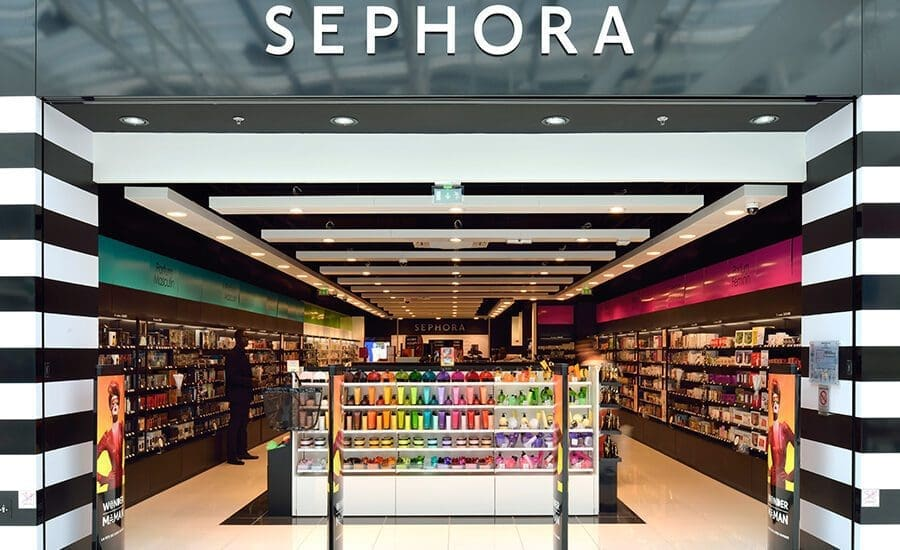

In [1]:
import pandas as pd
import numpy as np
import uuid
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Importing raw data  

First data (df1)= Brands with number of products

This DataFrame **df1** stores information about 100 cosmetic brands, including their names and the number of products sold by each brand at Sephora.

* brand: The name of the cosmetic brand.
* COUNT: A numerical value associated with each brand (the number of products).
* brand_id: A unique numerical identifier assigned to each brand.






In [3]:
df1=pd.read_csv('/content/drive/MyDrive/sephora/brands_w_m_products.csv')

First data cleaning

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    100 non-null    int64 
 1   brand         100 non-null    object
 2   COUNT(brand)  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [6]:
df1.head()


,Unnamed: 0,brand,COUNT(brand)
0,0,CLINIQUE,64
1,1,Murad,54
2,2,Perricone MD,52
3,3,Shiseido,52
4,4,Origins,45


In [7]:
df1.tail()

,Unnamed: 0,brand,COUNT(brand)
95,95,Naturally Serious,4
96,96,Nurse Jamie,4
97,97,Wander Beauty,4
98,98,BECCA,3
99,99,Briogeo,3


In [8]:
df1.shape


(100, 3)

Check null values


In [9]:
df1.isnull().sum()

,0
Unnamed: 0,0
brand,0
COUNT(brand),0


Check Duplicate Rows

In [10]:
df1.duplicated().sum()

0

Remove Missing Brands

In [11]:
df1.dropna(subset=['brand'], inplace=True)

Convert Count to Numeric

In [12]:
df1['COUNT(brand)'] = pd.to_numeric(df1['COUNT(brand)'], errors='coerce')

  Rename the column

In [14]:
df1.rename(columns={'COUNT(brand)': 'COUNT'}, inplace=True)

In [15]:
df1.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')

In [16]:
df1

,brand,COUNT
0,CLINIQUE,64
1,Murad,54
2,Perricone MD,52
3,Shiseido,52
4,Origins,45
...,...,...
95,Naturally Serious,4
96,Nurse Jamie,4
97,Wander Beauty,4
98,BECCA,3


Data types

In [17]:
df1.dtypes

,0
brand,object
COUNT,int64


Handle NaN values created by the conversion

In [18]:
df1.dropna(subset=['COUNT'], inplace=True)

DataFrame after dropping NaN values

In [19]:
df1

,brand,COUNT
0,CLINIQUE,64
1,Murad,54
2,Perricone MD,52
3,Shiseido,52
4,Origins,45
...,...,...
95,Naturally Serious,4
96,Nurse Jamie,4
97,Wander Beauty,4
98,BECCA,3


Standardize Brand Names

In [20]:
df1['brand'] = df1['brand'].str.strip().str.lower()

Creates a new column named "brand_id"

In [21]:
df1['brand_id'] = range(1, len(df1) + 1)

Checking the final result of the data

In [22]:
df1

,brand,COUNT,brand_id
0,clinique,64,1
1,murad,54,2
2,perricone md,52,3
3,shiseido,52,4
4,origins,45,5
...,...,...,...
95,naturally serious,4,96
96,nurse jamie,4,97
97,wander beauty,4,98
98,becca,3,99


Second data(df2) = "most_expensive"


Importing raw data for cleaning

In [23]:
df2 = pd.read_json('/content/drive/MyDrive/sephora/csvjson.json')


**df2** is a DataFrame containing information about a set of products, including their brand, name, and price.
*   brand: The brand of the product
*   name: The name of the product
*   price: The price of the product





In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0           100 non-null    int64 
 1   brand   100 non-null    object
 2   name    100 non-null    object
 3   price   100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


In [25]:
df2.head()

,,brand,name,price
0,0,Perricone MD,Neuropeptide Smoothing Facial Conformer,495
1,1,Guerlain,Orchid√©e Imp√©riale The Cream,460
2,2,SK-II,Ultimate Revival Cream,385
3,3,La Mer,The Concentrate,370
4,4,La Mer,The Regenerating Serum,345


In [26]:
df2.shape

(100, 4)

Check null Values

In [27]:
df2.isnull().sum()

,0
,0
brand,0
name,0
price,0


Remove rows with missing brand names

In [28]:
df2.dropna(subset=['brand', 'price'], how='all', inplace=True)  # Removes rows where BOTH 'brand' AND 'price' are NaN

In [29]:
df2

,,brand,name,price
0,0,Perricone MD,Neuropeptide Smoothing Facial Conformer,495
1,1,Guerlain,Orchid√©e Imp√©riale The Cream,460
2,2,SK-II,Ultimate Revival Cream,385
3,3,La Mer,The Concentrate,370
4,4,La Mer,The Regenerating Serum,345
...,...,...,...,...
95,95,StackedSkincare,PSC Peptide Serum,150
96,96,Eve Lom,WHITE Advanced Brightening Serum,150
97,97,Peter Thomas Roth,Un-Wrinkle¬Æ Turbo Face Serum,150
98,98,Perricone MD,Cold Plasma+ Face,149


In [30]:
df2.dropna(subset=['brand'], inplace=True)

Remove rows with percentage values in the 'brand' column (and other non-product rows)

In [31]:
df2 = df2[~df2['brand'].astype(str).str.contains('%')] #remove rows that contains % in the brand column

In [32]:
df2=df2[~df2['brand'].astype(str).str.contains('Other')]#remove rows that contains Other in the brand column

In [33]:
df2 = df2[~df2['name'].astype(str).str.contains('√©')]
df2 = df2[~df2['name'].astype(str).str.contains('¬Æ')]

In [34]:
df2 = df2[df2['price'].notna()] #remove rows that contains NaN in the price column

In [35]:
df2

,,brand,name,price
0,0,Perricone MD,Neuropeptide Smoothing Facial Conformer,495
2,2,SK-II,Ultimate Revival Cream,385
3,3,La Mer,The Concentrate,370
4,4,La Mer,The Regenerating Serum,345
6,6,Shiseido,Future Solution LX Intensive Firming Contour S...,306
...,...,...,...,...
94,94,Eve Lom,Age Defying Smoothing Treatment,150
95,95,StackedSkincare,PSC Peptide Serum,150
96,96,Eve Lom,WHITE Advanced Brightening Serum,150
98,98,Perricone MD,Cold Plasma+ Face,149


Combine multi-line product names

In [36]:
 df2['name'] = df2.groupby('brand')['name'].transform(lambda x: '\n'.join(x))
df2.drop_duplicates(subset=['brand','price'],inplace=True)

Convert 'price' to numeric

In [37]:
df2['price'] = pd.to_numeric(df2['price'], errors='coerce')

remove extra spaces from brands

In [38]:
df2['brand'] = df2['brand'].str.strip()


remove extra spaces from names

In [39]:
df2['name'] = df2['name'].str.strip()

Drop the first column

In [40]:
df2 = df2.reset_index(drop=True)

In [41]:
df2

,,brand,name,price
0,0,Perricone MD,Neuropeptide Smoothing Facial Conformer\nNeuro...,495
1,2,SK-II,Ultimate Revival Cream\nUltimate Revival Essen...,385
2,3,La Mer,The Concentrate\nThe Regenerating Serum\nThe M...,370
3,4,La Mer,The Concentrate\nThe Regenerating Serum\nThe M...,345
4,6,Shiseido,Future Solution LX Intensive Firming Contour S...,306
...,...,...,...,...
65,89,Peter Thomas Roth,FIRMx Growth Factor Extreme Neuropeptide Serum,150
66,90,StackedSkincare,EGF Activating Serum\nPSC Peptide Serum,150
67,94,Eve Lom,Age Defying Smoothing Treatment\nWHITE Advance...,150
68,98,Perricone MD,Neuropeptide Smoothing Facial Conformer\nNeuro...,149


In [42]:
df2.rename(columns={'': 'index'}, inplace=True)

In [43]:
df2

,index,brand,name,price
0,0,Perricone MD,Neuropeptide Smoothing Facial Conformer\nNeuro...,495
1,2,SK-II,Ultimate Revival Cream\nUltimate Revival Essen...,385
2,3,La Mer,The Concentrate\nThe Regenerating Serum\nThe M...,370
3,4,La Mer,The Concentrate\nThe Regenerating Serum\nThe M...,345
4,6,Shiseido,Future Solution LX Intensive Firming Contour S...,306
...,...,...,...,...
65,89,Peter Thomas Roth,FIRMx Growth Factor Extreme Neuropeptide Serum,150
66,90,StackedSkincare,EGF Activating Serum\nPSC Peptide Serum,150
67,94,Eve Lom,Age Defying Smoothing Treatment\nWHITE Advance...,150
68,98,Perricone MD,Neuropeptide Smoothing Facial Conformer\nNeuro...,149


In [44]:
df2 = df2.reset_index(drop=True)

In [45]:
df2

,index,brand,name,price
0,0,Perricone MD,Neuropeptide Smoothing Facial Conformer\nNeuro...,495
1,2,SK-II,Ultimate Revival Cream\nUltimate Revival Essen...,385
2,3,La Mer,The Concentrate\nThe Regenerating Serum\nThe M...,370
3,4,La Mer,The Concentrate\nThe Regenerating Serum\nThe M...,345
4,6,Shiseido,Future Solution LX Intensive Firming Contour S...,306
...,...,...,...,...
65,89,Peter Thomas Roth,FIRMx Growth Factor Extreme Neuropeptide Serum,150
66,90,StackedSkincare,EGF Activating Serum\nPSC Peptide Serum,150
67,94,Eve Lom,Age Defying Smoothing Treatment\nWHITE Advance...,150
68,98,Perricone MD,Neuropeptide Smoothing Facial Conformer\nNeuro...,149


In [46]:
df2.drop('index', axis=1, inplace=True)  # Drop the 'index' column

Checking final result

In [47]:
df2

,brand,name,price
0,Perricone MD,Neuropeptide Smoothing Facial Conformer\nNeuro...,495
1,SK-II,Ultimate Revival Cream\nUltimate Revival Essen...,385
2,La Mer,The Concentrate\nThe Regenerating Serum\nThe M...,370
3,La Mer,The Concentrate\nThe Regenerating Serum\nThe M...,345
4,Shiseido,Future Solution LX Intensive Firming Contour S...,306
...,...,...,...
65,Peter Thomas Roth,FIRMx Growth Factor Extreme Neuropeptide Serum,150
66,StackedSkincare,EGF Activating Serum\nPSC Peptide Serum,150
67,Eve Lom,Age Defying Smoothing Treatment\nWHITE Advance...,150
68,Perricone MD,Neuropeptide Smoothing Facial Conformer\nNeuro...,149


Third data(df3) = Product_info


Importing raw data for cleaning

In [48]:
df3=pd.read_csv('/content/drive/MyDrive/sephora/product_info.csv')

In [49]:
df3.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,fragrance discovery set,6342,19-69,6320,3.6364,11.0,not specified,size,1.7 oz/ 50 ml,...,0,0,1,0,0,"['unisex/ genderless scent', 'warm &spicy scen...",fragrance,value & gift sets,perfume gift sets,0
1,P473668,la habana eau de parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 ml,size + concentration + formulation,3.4 oz/ 100 ml,...,0,0,1,0,0,"['unisex/ genderless scent', 'layerable scent'...",fragrance,women,perfume,2
2,P473662,rainbow bar eau de parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 ml,size + concentration + formulation,3.4 oz/ 100 ml,...,0,0,1,0,0,"['unisex/ genderless scent', 'layerable scent'...",fragrance,women,perfume,2
3,P473660,kasbah eau de parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 ml,size + concentration + formulation,3.4 oz/ 100 ml,...,0,0,1,0,0,"['unisex/ genderless scent', 'layerable scent'...",fragrance,women,perfume,2
4,P473658,purple haze eau de parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 ml,size + concentration + formulation,3.4 oz/ 100 ml,...,0,0,1,0,0,"['unisex/ genderless scent', 'layerable scent'...",fragrance,women,perfume,2


In [50]:
df3.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'price_usd', 'value_price_usd', 'sale_price_usd', 'limited_edition',
       'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights',
       'primary_category', 'secondary_category', 'tertiary_category',
       'child_count'],
      dtype='object')

In [51]:
df3.dtypes

,0
product_id,object
product_name,object
brand_id,int64
brand_name,object
loves_count,int64
rating,float64
reviews,float64
size,object
variation_type,object
variation_value,object


In [52]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          1000 non-null   object 
 1   product_name        1000 non-null   object 
 2   brand_id            1000 non-null   int64  
 3   brand_name          1000 non-null   object 
 4   loves_count         1000 non-null   int64  
 5   rating              1000 non-null   float64
 6   reviews             1000 non-null   float64
 7   size                1000 non-null   object 
 8   variation_type      1000 non-null   object 
 9   variation_value     1000 non-null   object 
 10  price_usd           1000 non-null   float64
 11  value_price_usd     1000 non-null   float64
 12  sale_price_usd      1000 non-null   float64
 13  limited_edition     1000 non-null   int64  
 14  new                 1000 non-null   int64  
 15  online_only         1000 non-null   int64  
 16  out_of_

In [53]:
df3.shape

(1000, 23)

Handle Missing Values

In [54]:
df3.isnull().sum()

,0
product_id,0
product_name,0
brand_id,0
brand_name,0
loves_count,0
rating,0
reviews,0
size,0
variation_type,0
variation_value,0


Drop unnecessary columns

In [55]:
columns_to_drop = ['variation_desc', 'ingredients', 'child_max_price', 'child_min_price','variation_type','variation_value','child_count','highlights','new','out_of_stock','limited_edition']
df3.drop(columns=columns_to_drop, inplace=True, errors='ignore') # errors='ignore' prevents errors if a column doesn't exist

Standardize text columns (lowercase, remove extra spaces)

In [56]:
text_cols = ['product_name', 'brand_name', 'primary_category', 'secondary_category', 'tertiary_category']

for col in text_cols:
    if col in df3.columns:  # Check if column exists
        df3[col] = df3[col].astype(str).str.lower().str.strip()
        df3[col] = df3[col].replace(r'\s+', ' ', regex=True)

Handling Missing Value

In [57]:
#rating and reviews (since they have the same missing values)
df3['rating'].fillna(0, inplace=True)  # Fill with 0 (meaning no rating)
df3['reviews'].fillna(0, inplace=True)

<ipython-input-57-4d513d1cf5a1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['rating'].fillna(0, inplace=True)  # Fill with 0 (meaning no rating)
<ipython-input-57-4d513d1cf5a1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [58]:
df3

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,price_usd,value_price_usd,sale_price_usd,online_only,sephora_exclusive,primary_category,secondary_category,tertiary_category
0,P473671,fragrance discovery set,6342,19-69,6320,3.6364,11.0,not specified,35.0,35.0,0.0,1,0,fragrance,value & gift sets,perfume gift sets
1,P473668,la habana eau de parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
2,P473662,rainbow bar eau de parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
3,P473660,kasbah eau de parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
4,P473658,purple haze eau de parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P481959,wake the f*ck up deodorant,8007,by rosie jane,7318,3.9773,44.0,2oz / 59ml,15.0,15.0,0.0,1,0,bath & body,body care,deodorant & antiperspirant
996,P431765,leila lou perfume travel spray,8007,by rosie jane,5363,4.2931,58.0,0.25 oz/ 7.5 ml,28.0,28.0,0.0,0,1,fragrance,women,rollerballs & travel size
997,P431444,rosie perfume,8007,by rosie jane,4794,4.4498,249.0,1.7 oz/ 50 ml,70.0,70.0,0.0,0,0,fragrance,women,perfume
998,P479736,wake the f*ck up everyday body wash,8007,by rosie jane,4567,4.1250,8.0,8 oz/ 236 ml,25.0,25.0,0.0,1,0,bath & body,bath & shower,body wash & shower gel


Handling missing values

In [59]:
missing_value_formats = ["nan", " ", ""] #Add all the representations of missing values
for col in ['size']:
    if col in df3.columns:
        df3[col] = df3[col].replace(missing_value_formats, np.nan)

# --- Handling Missing Values ---
fillna_cols = ['size']
for col in fillna_cols:
    if col in df3.columns:
        df3[col] = df3[col].fillna('not specified')

In [60]:
df3

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,price_usd,value_price_usd,sale_price_usd,online_only,sephora_exclusive,primary_category,secondary_category,tertiary_category
0,P473671,fragrance discovery set,6342,19-69,6320,3.6364,11.0,not specified,35.0,35.0,0.0,1,0,fragrance,value & gift sets,perfume gift sets
1,P473668,la habana eau de parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
2,P473662,rainbow bar eau de parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
3,P473660,kasbah eau de parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
4,P473658,purple haze eau de parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P481959,wake the f*ck up deodorant,8007,by rosie jane,7318,3.9773,44.0,2oz / 59ml,15.0,15.0,0.0,1,0,bath & body,body care,deodorant & antiperspirant
996,P431765,leila lou perfume travel spray,8007,by rosie jane,5363,4.2931,58.0,0.25 oz/ 7.5 ml,28.0,28.0,0.0,0,1,fragrance,women,rollerballs & travel size
997,P431444,rosie perfume,8007,by rosie jane,4794,4.4498,249.0,1.7 oz/ 50 ml,70.0,70.0,0.0,0,0,fragrance,women,perfume
998,P479736,wake the f*ck up everyday body wash,8007,by rosie jane,4567,4.1250,8.0,8 oz/ 236 ml,25.0,25.0,0.0,1,0,bath & body,bath & shower,body wash & shower gel


In [61]:
# --- Handling Missing Values in Numeric Columns (filling with 0) ---
numeric_cols_with_missing = ['rating', 'reviews']
for col in numeric_cols_with_missing:
    if col in df3.columns:
        df3[col] = df3[col].fillna(0)

In [62]:
# Price related
df3['value_price_usd'] = df3['value_price_usd'].fillna(df3['price_usd'])
df3['sale_price_usd'] = df3['sale_price_usd'].fillna(0)




In [63]:
df3

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,price_usd,value_price_usd,sale_price_usd,online_only,sephora_exclusive,primary_category,secondary_category,tertiary_category
0,P473671,fragrance discovery set,6342,19-69,6320,3.6364,11.0,not specified,35.0,35.0,0.0,1,0,fragrance,value & gift sets,perfume gift sets
1,P473668,la habana eau de parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
2,P473662,rainbow bar eau de parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
3,P473660,kasbah eau de parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
4,P473658,purple haze eau de parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P481959,wake the f*ck up deodorant,8007,by rosie jane,7318,3.9773,44.0,2oz / 59ml,15.0,15.0,0.0,1,0,bath & body,body care,deodorant & antiperspirant
996,P431765,leila lou perfume travel spray,8007,by rosie jane,5363,4.2931,58.0,0.25 oz/ 7.5 ml,28.0,28.0,0.0,0,1,fragrance,women,rollerballs & travel size
997,P431444,rosie perfume,8007,by rosie jane,4794,4.4498,249.0,1.7 oz/ 50 ml,70.0,70.0,0.0,0,0,fragrance,women,perfume
998,P479736,wake the f*ck up everyday body wash,8007,by rosie jane,4567,4.1250,8.0,8 oz/ 236 ml,25.0,25.0,0.0,1,0,bath & body,bath & shower,body wash & shower gel


Data Type Conversion

In [64]:
numeric_cols = ['loves_count', 'rating', 'reviews', 'price_usd', 'value_price_usd', 'sale_price_usd']
for col in numeric_cols:
    if col in df3.columns:
        df3[col] = pd.to_numeric(df3[col], errors='coerce')

In [65]:
df3.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,price_usd,value_price_usd,sale_price_usd,online_only,sephora_exclusive,primary_category,secondary_category,tertiary_category
0,P473671,fragrance discovery set,6342,19-69,6320,3.6364,11.0,not specified,35.0,35.0,0.0,1,0,fragrance,value & gift sets,perfume gift sets
1,P473668,la habana eau de parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
2,P473662,rainbow bar eau de parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
3,P473660,kasbah eau de parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
4,P473658,purple haze eau de parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume


In [67]:
df3.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,price_usd,value_price_usd,sale_price_usd,online_only,sephora_exclusive,primary_category,secondary_category,tertiary_category
0,P473671,fragrance discovery set,6342,19-69,6320,3.6364,11.0,not specified,35.0,35.0,0.0,1,0,fragrance,value & gift sets,perfume gift sets
1,P473668,la habana eau de parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
2,P473662,rainbow bar eau de parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
3,P473660,kasbah eau de parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume
4,P473658,purple haze eau de parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 ml,195.0,195.0,0.0,1,0,fragrance,women,perfume


Matching brand_id in "df1" with the brand_id in "df3"

In [68]:
#  Clean 'brand_name' in df3
if 'brand_name' in df3.columns:
    df3['brand_name'] = df3['brand_name'].str.strip().str.lower()
else:
    print("Error: 'brand_name' column not found in df3.")
    exit()

In [69]:
# Create a dictionary mapping brand names to brand_ids from df1
brand_id_map = dict(zip(df1['brand'], df1['brand_id']))

In [70]:
# Map the brand_ids to df3 based on 'brand_name' ---
df3['brand_id'] = df3['brand_name'].map(brand_id_map)

In [71]:
# Remove rows with unmatched brand names
df3 = df3.dropna(subset=['brand_id'])

In [72]:
# Remove decimals from brand_id in df3 (if it's a float column)
if pd.api.types.is_numeric_dtype(df3['brand_id']): #Check if the column is numeric
    df3['brand_id'] = df3['brand_id'].astype(int)

<ipython-input-72-a5a9bd384534>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['brand_id'] = df3['brand_id'].astype(int)


Checking final results

In [73]:
df3

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,price_usd,value_price_usd,sale_price_usd,online_only,sephora_exclusive,primary_category,secondary_category,tertiary_category
89,P439055,genius sleeping collagen moisturizer,11,algenist,33910,4.5413,1321.0,2 oz/ 60 ml,98.0,98.0,0.0,0,1,skincare,moisturizers,moisturizers
90,P421277,genius liquid collagen serum,11,algenist,67870,4.0259,1159.0,1 oz / 30 ml,115.0,115.0,0.0,0,1,skincare,treatments,face serums
91,P467602,triple algae eye renewal balm eye cream,11,algenist,17890,4.5306,1142.0,not specified,68.0,68.0,0.0,0,1,skincare,eye care,eye creams & treatments
92,P432045,genius liquid collagen lip treatment,11,algenist,44448,3.8721,649.0,.5 oz / 15 ml,29.0,29.0,0.0,0,1,skincare,lip balms & treatments,nan
93,P311143,sublime defense ultra lightweight uv defense f...,11,algenist,27278,4.4134,508.0,1 oz,28.0,28.0,0.0,0,0,skincare,sunscreen,face sunscreen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,P474027,farewell frizz smooth + shine hair care travel...,100,briogeo,5804,2.2857,14.0,not specified,30.0,48.0,0.0,0,0,hair,value & gift sets,nan
847,P471537,superfoods mango + cherry oil control & balanc...,100,briogeo,5536,4.6477,176.0,12.5 oz/ 369 ml,30.0,30.0,0.0,0,1,hair,shampoo & conditioner,conditioner
848,P480578,blossom & bloom volumize + lift hair care trav...,100,briogeo,4140,2.8333,6.0,not specified,25.0,36.0,0.0,1,0,hair,value & gift sets,nan
849,P505040,"be gentle, be kind aloe + oat milk ultra sooth...",100,briogeo,648,4.8434,83.0,3.7 oz / 104 g,25.0,25.0,0.0,0,0,hair,shampoo & conditioner,shampoo


In [74]:
df1

,brand,COUNT,brand_id
0,clinique,64,1
1,murad,54,2
2,perricone md,52,3
3,shiseido,52,4
4,origins,45,5
...,...,...,...
95,naturally serious,4,96
96,nurse jamie,4,97
97,wander beauty,4,98
98,becca,3,99


In [76]:

df1.to_csv('/content/cleaned_data1.csv', index=False)

df3.to_csv('/content/cleaned_data3.csv', index=False)

# Save the JSON dataset
df2.to_json('/content/cleaned_data2.json', orient='records', lines=True)


from google.colab import files
files.download('/content/cleaned_data1.csv')
files.download('/content/cleaned_data3.csv')
files.download('/content/cleaned_data2.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>